In [1]:
#Initialize
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Import Data
flights = pd.read_csv('flights-small.csv', names = ['month_id', 'day_of_month', 'day_of_week_id', 'carrier_id', 'flight_num', 'origin_city', 'origin_state', 'dest_city', 'dest_state', 'depature_delay', 'taxi_out', 'arrival_delay', 'canceled', 'actual_time', 'distance', 'capacity', 'price'])
carriers = pd.read_csv('carriers.csv', names = ['cid', 'name'])
months = pd.read_csv('months.csv', names = ['mid', 'month'])
weekdays = pd.read_csv('weekdays.csv', names = ['did', 'day_of_week'])



**QUESTION 1**: Find the maximum price of tickets between Seattle and New York, NY (i.e. Seattle to NY or NY to Seattle) for each carrier.

Text(0.5, 1.0, 'Max Ticket Price of Each Airline (NY <> Seattle)')

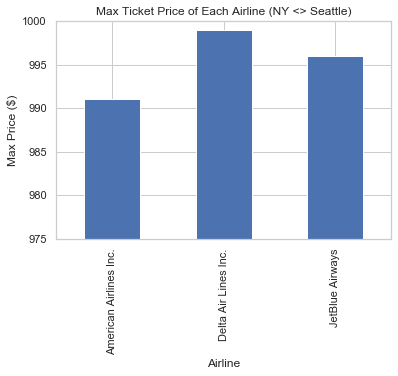

In [5]:
#Join flights & carrier data tables
data = pd.merge(left=flights, right=carriers, left_on='carrier_id', right_on='cid')
#Filter flight to NY & Seattle -- only 3 airlines so no need to filter top 15
temp1 = data.loc[((data['origin_city'] == 'Seattle WA') & (data['dest_city'] == 'New York NY')) | ((data['origin_city'] == 'New York NY') & (data['dest_city'] == 'Seattle WA'))]
vals = temp1.groupby('name').price.max()

#plot
vals.plot(kind = 'bar')
plt.xlabel('Airline')
plt.ylabel('Max Price ($)')
axes = plt.gca()
axes.set_ylim([975,1000])
plt.title('Max Ticket Price of Each Airline (NY <> Seattle)')

**QUESTION 2**: For all the direct flights from Seattle to Boston by Alaska Airlines Inc., visualize the average cost of a ticket by day of the week.

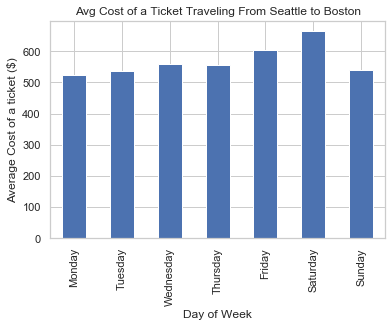

In [3]:
#Join flights and weekdays table
data = pd.merge(left=flights, right=weekdays, left_on='day_of_week_id', right_on='did')
#Filter flights going to Boston from Seattle
temp2 = data.loc[((data['origin_city'] == 'Seattle WA') & (data['dest_city'] == 'Boston MA'))]
#Calc avg price per day
vals = temp2.groupby('day_of_week').price.mean()
#Plot
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vals.loc[day_order].plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Cost of a ticket ($)')
plt.title('Avg Cost of a Ticket Traveling From Seattle to Boston')
plt.show()

**QUESTION 3**: Which flights would you recommend I consider if I wanted to travel as far as possible in the least amount of time from Seattle? 

Answer: Miami - furthest distance and fastest avg speed (distance over time) of flight

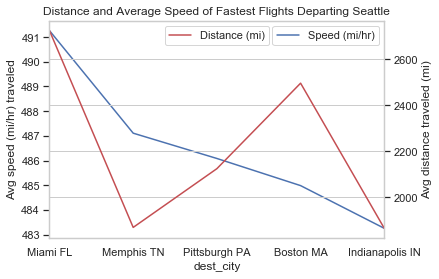

In [4]:
#filter data to only flights leaving Seattle
temp3 = flights.loc[((flights['origin_city'] == 'Seattle WA'))]
#Calculate Avg Speed and Avg Distance to each destination city
speed_calc = ((temp3.groupby('dest_city').distance.mean())*60)/(temp3.groupby('dest_city').actual_time.mean())
distance_calc = (temp3.groupby('dest_city').distance.mean())
#Combine Speed and Distance calc
result = pd.concat([speed_calc, distance_calc], axis=1, sort=False)
result.rename(columns = {0:'speed'}, inplace = True) 
#Plot
ax = result.nlargest(5,'speed').speed.plot(label = 'Speed (mi/hr)')
plt.ylabel('Avg speed (mi/hr) traveled')
plt.legend(['Speed (mi/hr)'])
ax = result.nlargest(5,'speed').distance.plot(secondary_y=True, color='r', label = 'Distance (miles)')
plt.title('Distance and Average Speed of Fastest Flights Departing Seattle')
plt.xlabel('Destinations')
plt.ylabel('Avg distance traveled (mi)')
plt.legend(['Distance (mi)'], loc = 'upper center')
plt.show()
